#Step 5
Optimization with uncertain graph weights

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import copy

import Code.utils as utils
import Code.environment.settings as settings
from Code.environment.Environment import Environment
from Code.GreedyLearner import GreedyLearner
from Code.environment.Customer import Customer
from Code.UCBLearner import UCBLearner
from Code.TSLearner import TSLearner
from Code.UCBLearner4 import UCBLearner4
from Code.TSLearner4 import TSLearner4
from Code.UCBLearner5 import UCBLearner5
from Code.TSLearner5 import TSLearner5

%matplotlib inline

In [2]:
cust_json = "customer3.json"
today_customer = 150
var_cust = 10
p_lambda = 1.0
graph_json = "business_full_graph2_sparse.json"

arms = settings.prices
environment = Environment(cust_json,today_customer,var_cust,p_lambda, graph_json, arms)
clairvoyant_arms, clairvoyant_reward, exp_c, rew_per_arm= environment.estimate_clairvoyant()
print("\n", clairvoyant_arms, clairvoyant_reward, exp_c)

loading: [                              ] 0.0%
loading: [=                             ] 1.0%
loading: [=                             ] 2.0%
loading: [=                             ] 2.9%
loading: [==                            ] 3.9%
loading: [==                            ] 4.9%
loading: [==                            ] 5.9%
loading: [===                           ] 6.8%
loading: [===                           ] 7.8%
loading: [===                           ] 8.8%
loading: [===                           ] 9.8%
loading: [====                          ] 10.7%
loading: [====                          ] 11.7%
loading: [====                          ] 12.7%
loading: [=====                         ] 13.7%
loading: [=====                         ] 14.6%
loading: [=====                         ] 15.6%
loading: [=====                         ] 16.6%
loading: [======                        ] 17.6%
loading: [======                        ] 18.6%
loading: [======                        ] 19.5%
loa

In [3]:
n_arms = 4
n_products = 5 

feature1 = 0
feature2 = 0

customer = Customer(feature1, feature2)

TIME_HORIZON = 300
NUM_ITERATION = 5

In [4]:
#unknown param

customers = copy.deepcopy(environment.customers)
for customer in customers:
    customer.set_probability_buy(np.ones_like(customer.get_buy_distribution()))
    customer.set_probability_click(np.ones((n_products,n_products)))

UCB

In [5]:
rewards_iterations = []
for i in range(NUM_ITERATION):
    ucb5_learner = UCBLearner5(n_arms, n_products, customers, graph_json, arms, environment.customers_distribution)
    print('Iteration #', i+1)
    for t in range(TIME_HORIZON):
        if t % 10 == 0:
            utils.progress_bar(t, TIME_HORIZON)
        super_arm = ucb5_learner.select_superarm()
        report = environment.round(super_arm)
        ucb5_learner.update(super_arm.copy(), report)
    rewards = ucb5_learner.history_rewards
    rewards_iterations.append(np.array(rewards))
rewards_iterations = np.array(rewards_iterations)
rewards_iterations.shape

Iteration # 1
loading: [                              ] 0.0%
[[0.         0.18181818 0.         0.         0.        ]
 [0.46666667 0.         0.         0.         0.06666667]
 [0.         0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.        ]
 [0.66666667 0.         0.         0.         0.        ]]
[[0.         0.13636364 0.         0.         0.        ]
 [0.31818182 0.         0.         0.         0.04545455]
 [0.57142857 0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.        ]
 [0.31578947 0.         0.05263158 0.         0.        ]]
[[0.         0.23333333 0.         0.         0.        ]
 [0.38709677 0.         0.         0.         0.03225806]
 [0.41666667 0.         0.         0.         0.        ]
 [0.5        0.         0.         0.         0.        ]
 [0.42424242 0.         0.06060606 0.         0.        ]]
[[0.         0.13207547 0.         0.         0.01886792]
 [0.5094

[[0.         0.26961771 0.         0.         0.06036217]
 [0.50397878 0.         0.         0.         0.03448276]
 [0.41573034 0.         0.         0.16853933 0.        ]
 [0.56918239 0.         0.03773585 0.         0.        ]
 [0.42121212 0.         0.06060606 0.         0.        ]]
[[0.         0.25968992 0.         0.         0.05813953]
 [0.5        0.         0.         0.         0.03266332]
 [0.41758242 0.         0.         0.16483516 0.        ]
 [0.56534954 0.         0.03647416 0.         0.        ]
 [0.4159292  0.         0.05899705 0.         0.        ]]
loading: [===                           ] 10.0%
[[0.         0.25233645 0.         0.         0.05794393]
 [0.49403341 0.         0.         0.         0.03579952]
 [0.40104167 0.         0.         0.16666667 0.        ]
 [0.5601173  0.         0.03519062 0.         0.        ]
 [0.42178771 0.         0.06145251 0.         0.        ]]
[[0.         0.25952813 0.         0.         0.05626134]
 [0.49184149 0.      

[[0.         0.26441881 0.         0.         0.0700976 ]
 [0.4982415  0.         0.         0.         0.02461899]
 [0.37469586 0.         0.         0.13138686 0.        ]
 [0.59214502 0.         0.04984894 0.         0.        ]
 [0.40312094 0.         0.04811443 0.         0.        ]]
[[0.         0.26436782 0.         0.         0.06984969]
 [0.49766355 0.         0.         0.         0.02453271]
 [0.37621359 0.         0.         0.13106796 0.        ]
 [0.5884101  0.         0.04903418 0.         0.        ]
 [0.40279543 0.         0.04701398 0.         0.        ]]
[[0.         0.26269702 0.         0.         0.06917688]
 [0.49713631 0.         0.         0.         0.02405498]
 [0.38117647 0.         0.         0.13176471 0.        ]
 [0.58711567 0.         0.04831625 0.         0.        ]
 [0.40473225 0.         0.04607721 0.         0.        ]]
[[0.         0.26415094 0.         0.         0.06861063]
 [0.49774266 0.         0.         0.         0.02370203]
 [0.3821510

[[0.         0.27329903 0.         0.         0.07604345]
 [0.49439103 0.         0.         0.         0.02323718]
 [0.39270073 0.         0.         0.13284672 0.        ]
 [0.57838364 0.         0.05647517 0.         0.        ]
 [0.40529363 0.         0.04797353 0.         0.        ]]
[[0.         0.27349465 0.         0.         0.07653348]
 [0.49404289 0.         0.         0.         0.02382844]
 [0.39393939 0.         0.         0.13419913 0.        ]
 [0.57950192 0.         0.05651341 0.         0.        ]
 [0.40359477 0.         0.04738562 0.         0.        ]]
[[0.         0.27333333 0.         0.         0.07666667]
 [0.49291339 0.         0.         0.         0.02362205]
 [0.39167862 0.         0.         0.1348637  0.        ]
 [0.58199052 0.         0.05592417 0.         0.        ]
 [0.40612409 0.         0.0467365  0.         0.        ]]
[[0.         0.27497256 0.         0.         0.07793633]
 [0.49219969 0.         0.         0.         0.02340094]
 [0.3924050

[[0.         0.27801003 0.         0.         0.07859532]
 [0.48383234 0.         0.         0.         0.02215569]
 [0.375      0.         0.         0.1487069  0.        ]
 [0.58109091 0.         0.05527273 0.         0.        ]
 [0.40463132 0.         0.04814138 0.         0.        ]]
[[0.         0.27879039 0.         0.         0.07870754]
 [0.48341232 0.         0.         0.         0.02191943]
 [0.37513398 0.         0.         0.14790997 0.        ]
 [0.57989877 0.         0.054953   0.         0.        ]
 [0.40568319 0.         0.04836759 0.         0.        ]]
[[0.         0.27990136 0.         0.         0.0785039 ]
 [0.48497348 0.         0.         0.         0.02180318]
 [0.37486688 0.         0.         0.14802982 0.        ]
 [0.57845934 0.         0.05420827 0.         0.        ]
 [0.40467626 0.         0.04856115 0.         0.        ]]
[[0.         0.27947776 0.         0.         0.07833537]
 [0.48481308 0.         0.         0.         0.02161215]
 [0.3717001

[[0.         0.27702479 0.         0.         0.08066116]
 [0.48111426 0.         0.         0.         0.02030217]
 [0.37913486 0.         0.         0.14673452 0.        ]
 [0.58275463 0.         0.05439815 0.         0.        ]
 [0.40430739 0.         0.04601077 0.         0.        ]]
[[0.         0.27715969 0.         0.         0.07984293]
 [0.48078725 0.         0.         0.         0.02014995]
 [0.37762826 0.         0.         0.14550042 0.        ]
 [0.58405049 0.         0.05393001 0.         0.        ]
 [0.40514313 0.         0.04560893 0.         0.        ]]
[[0.         0.27824675 0.         0.         0.08019481]
 [0.48182665 0.         0.         0.         0.02003728]
 [0.37833333 0.         0.         0.14583333 0.        ]
 [0.58414147 0.         0.05419281 0.         0.        ]
 [0.40518483 0.         0.0456073  0.         0.        ]]
[[0.         0.2777599  0.         0.         0.08014162]
 [0.48081368 0.         0.         0.         0.02034212]
 [0.3783112

[[0.         0.27711497 0.         0.         0.0818872 ]
 [0.49076621 0.         0.         0.         0.02239686]
 [0.37508556 0.         0.         0.14168378 0.        ]
 [0.58309318 0.         0.05379443 0.         0.        ]
 [0.40861514 0.         0.0479066  0.         0.        ]]
[[0.         0.27851173 0.         0.         0.08250202]
 [0.49047063 0.         0.         0.         0.02255932]
 [0.3753406  0.         0.         0.14100817 0.        ]
 [0.58413002 0.         0.0540153  0.         0.        ]
 [0.40896359 0.         0.04761905 0.         0.        ]]
loading: [=================             ] 56.7%
[[0.         0.27856569 0.         0.         0.08215146]
 [0.49227799 0.         0.         0.         0.02239382]
 [0.37508463 0.         0.         0.140826   0.        ]
 [0.58468126 0.         0.05375833 0.         0.        ]
 [0.40885521 0.         0.04746709 0.         0.        ]]
[[0.         0.27792553 0.         0.         0.08244681]
 [0.49039939 0.      

[[0.         0.2812213  0.         0.         0.08516988]
 [0.48895582 0.         0.         0.         0.02208835]
 [0.37226697 0.         0.         0.14441887 0.        ]
 [0.58825927 0.         0.05258867 0.         0.        ]
 [0.41127056 0.         0.04760238 0.         0.        ]]
[[0.         0.28150685 0.         0.         0.08493151]
 [0.48849617 0.         0.         0.         0.02234078]
 [0.3713467  0.         0.         0.14498567 0.        ]
 [0.58945233 0.         0.05273834 0.         0.        ]
 [0.40981894 0.         0.04770195 0.         0.        ]]
[[0.         0.28220859 0.         0.         0.08498069]
 [0.48784549 0.         0.         0.         0.02231102]
 [0.37207977 0.         0.         0.14472934 0.        ]
 [0.58997169 0.         0.0529721  0.         0.        ]
 [0.41005199 0.         0.04818024 0.         0.        ]]
[[0.         0.28293785 0.         0.         0.08497175]
 [0.48706038 0.         0.         0.         0.0222296 ]
 [0.3716713

[[0.         0.28608299 0.         0.         0.08695652]
 [0.49312665 0.         0.         0.         0.02193624]
 [0.37655241 0.         0.         0.14704421 0.        ]
 [0.58950727 0.         0.05104573 0.         0.        ]
 [0.40882801 0.         0.04840183 0.         0.        ]]
[[0.         0.28692733 0.         0.         0.08708531]
 [0.4927241  0.         0.         0.         0.02211874]
 [0.37598814 0.         0.         0.14673913 0.        ]
 [0.59005992 0.         0.05111033 0.         0.        ]
 [0.4098063  0.         0.04812349 0.         0.        ]]
[[0.         0.28678206 0.         0.         0.0877262 ]
 [0.49260655 0.         0.         0.         0.02203537]
 [0.37598425 0.         0.         0.14616142 0.        ]
 [0.58924807 0.         0.05130007 0.         0.        ]
 [0.41000904 0.         0.04823636 0.         0.        ]]
[[0.         0.28686117 0.         0.         0.08752692]
 [0.49148137 0.         0.         0.         0.02223506]
 [0.3757961

[[0.         0.28611452 0.         0.         0.08649974]
 [0.49467947 0.         0.         0.         0.02335842]
 [0.37784588 0.         0.         0.14754816 0.        ]
 [0.58523616 0.         0.04817016 0.         0.        ]
 [0.4097561  0.         0.04796748 0.         0.        ]]
[[0.         0.28648649 0.         0.         0.08718396]
 [0.49534643 0.         0.         0.         0.02326784]
 [0.37804878 0.         0.         0.14721254 0.        ]
 [0.58548739 0.         0.04827157 0.         0.        ]
 [0.40955724 0.         0.04778618 0.         0.        ]]
[[0.         0.2866574  0.         0.         0.08721334]
 [0.49472601 0.         0.         0.         0.02341137]
 [0.37760417 0.         0.         0.14713542 0.        ]
 [0.58560794 0.         0.04869727 0.         0.        ]
 [0.4102633  0.         0.04755508 0.         0.        ]]
[[0.         0.28678131 0.         0.         0.08719819]
 [0.49436764 0.         0.         0.         0.02355351]
 [0.3778642

[[0.         0.28949843 0.         0.         0.0862069 ]
 [0.49767334 0.         0.         0.         0.02326664]
 [0.3776908  0.         0.         0.14794521 0.        ]
 [0.58488988 0.         0.04739336 0.         0.        ]
 [0.41206644 0.         0.0481192  0.         0.        ]]
[[0.         0.2895765  0.         0.         0.08641975]
 [0.49826107 0.         0.         0.         0.02318572]
 [0.37734375 0.         0.         0.14765625 0.        ]
 [0.58455984 0.         0.04720911 0.         0.        ]
 [0.41189374 0.         0.04825737 0.         0.        ]]
[[0.         0.28911353 0.         0.         0.08662519]
 [0.49838262 0.         0.         0.         0.02310536]
 [0.3765072  0.         0.         0.14741346 0.        ]
 [0.58494743 0.         0.04703929 0.         0.        ]
 [0.4114786  0.         0.04839494 0.         0.        ]]
[[0.         0.28836921 0.         0.         0.08626297]
 [0.49838858 0.         0.         0.         0.02302026]
 [0.3770809

[[0.         0.28873239 0.         0.         0.0915493 ]
 [0.43333333 0.         0.         0.         0.03333333]
 [0.35714286 0.         0.         0.15714286 0.        ]
 [0.61038961 0.         0.09090909 0.         0.        ]
 [0.4950495  0.         0.00990099 0.         0.        ]]
[[0.         0.29375    0.         0.         0.09375   ]
 [0.40594059 0.         0.         0.         0.02970297]
 [0.37662338 0.         0.         0.15584416 0.        ]
 [0.62352941 0.         0.08235294 0.         0.        ]
 [0.46846847 0.         0.02702703 0.         0.        ]]
loading: [=                             ] 3.3%
[[0.         0.28070175 0.         0.         0.0877193 ]
 [0.43103448 0.         0.         0.         0.03448276]
 [0.37662338 0.         0.         0.15584416 0.        ]
 [0.62790698 0.         0.08139535 0.         0.        ]
 [0.46846847 0.         0.02702703 0.         0.        ]]
[[0.         0.28804348 0.         0.         0.08152174]
 [0.43165468 0.       

[[0.         0.29365079 0.         0.         0.06878307]
 [0.46052632 0.         0.         0.         0.02631579]
 [0.38629283 0.         0.         0.13395639 0.        ]
 [0.61481481 0.         0.05432099 0.         0.        ]
 [0.446      0.         0.046      0.         0.        ]]
[[0.         0.29240506 0.         0.         0.06962025]
 [0.46835443 0.         0.         0.         0.02712477]
 [0.39039039 0.         0.         0.13213213 0.        ]
 [0.61870504 0.         0.05275779 0.         0.        ]
 [0.44444444 0.         0.04483431 0.         0.        ]]
[[0.         0.29520295 0.         0.         0.0701107 ]
 [0.46315789 0.         0.         0.         0.02807018]
 [0.38575668 0.         0.         0.13353116 0.        ]
 [0.61395349 0.         0.05348837 0.         0.        ]
 [0.4345351  0.         0.04364326 0.         0.        ]]
[[0.         0.29700599 0.         0.         0.07065868]
 [0.46023689 0.         0.         0.         0.02707276]
 [0.3793103

[[0.         0.31667792 0.         0.         0.08507765]
 [0.47181628 0.         0.         0.         0.03444676]
 [0.40228013 0.         0.         0.14169381 0.        ]
 [0.58386684 0.         0.05121639 0.         0.        ]
 [0.43567568 0.         0.04432432 0.         0.        ]]
[[0.         0.31638045 0.         0.         0.08322325]
 [0.47131148 0.         0.         0.         0.03483607]
 [0.40192926 0.         0.         0.14308682 0.        ]
 [0.58668342 0.         0.05025126 0.         0.        ]
 [0.43769968 0.         0.04366347 0.         0.        ]]
[[0.         0.31681877 0.         0.         0.08279009]
 [0.47135678 0.         0.         0.         0.03417085]
 [0.39810427 0.         0.         0.14375987 0.        ]
 [0.58650307 0.         0.04907975 0.         0.        ]
 [0.43528184 0.         0.04384134 0.         0.        ]]
[[0.         0.31666667 0.         0.         0.08333333]
 [0.47435897 0.         0.         0.         0.03353057]
 [0.4037267

[[0.         0.32379165 0.         0.         0.08352886]
 [0.47545788 0.         0.         0.         0.03003663]
 [0.38167053 0.         0.         0.14037123 0.        ]
 [0.58202443 0.         0.04537522 0.         0.        ]
 [0.43541364 0.         0.0478955  0.         0.        ]]
[[0.         0.32313398 0.         0.         0.08298563]
 [0.4736081  0.         0.         0.         0.0296457 ]
 [0.38117107 0.         0.         0.13892078 0.        ]
 [0.5819601  0.         0.04509974 0.         0.        ]
 [0.43512545 0.         0.04874552 0.         0.        ]]
[[0.         0.3220339  0.         0.         0.08245534]
 [0.47560976 0.         0.         0.         0.02941176]
 [0.38154897 0.         0.         0.14009112 0.        ]
 [0.57989691 0.         0.04467354 0.         0.        ]
 [0.43696884 0.         0.04957507 0.         0.        ]]
[[0.         0.32215677 0.         0.         0.08246488]
 [0.4772404  0.         0.         0.         0.02916074]
 [0.3833145

[[0.         0.32058613 0.         0.         0.08577555]
 [0.48549107 0.         0.         0.         0.02845982]
 [0.40052356 0.         0.         0.14223386 0.        ]
 [0.58651226 0.         0.04768392 0.         0.        ]
 [0.43277778 0.         0.04944444 0.         0.        ]]
[[0.         0.32042629 0.         0.         0.08561279]
 [0.48344371 0.         0.         0.         0.02869757]
 [0.39982578 0.         0.         0.14198606 0.        ]
 [0.58462576 0.         0.04787593 0.         0.        ]
 [0.43250689 0.         0.04903581 0.         0.        ]]
[[0.         0.31938094 0.         0.         0.08617657]
 [0.48277747 0.         0.         0.         0.02897758]
 [0.39982654 0.         0.         0.14223764 0.        ]
 [0.58562794 0.         0.0483546  0.         0.        ]
 [0.43380744 0.         0.04868709 0.         0.        ]]
[[0.         0.31824513 0.         0.         0.08635097]
 [0.48318872 0.         0.         0.         0.02874187]
 [0.4003466

[[0.         0.31150851 0.         0.         0.08566484]
 [0.48526786 0.         0.         0.         0.02678571]
 [0.39798125 0.         0.         0.13914924 0.        ]
 [0.58020663 0.         0.05002719 0.         0.        ]
 [0.43438914 0.         0.05067873 0.         0.        ]]
[[0.         0.31190818 0.         0.         0.08522238]
 [0.48558758 0.         0.         0.         0.02660754]
 [0.39586305 0.         0.         0.13837375 0.        ]
 [0.57954545 0.         0.04978355 0.         0.        ]
 [0.43378378 0.         0.05045045 0.         0.        ]]
loading: [===============               ] 50.0%
[[0.         0.31184023 0.         0.         0.0850214 ]
 [0.48592788 0.         0.         0.         0.02638522]
 [0.39488636 0.         0.         0.13849432 0.        ]
 [0.57962466 0.         0.04932976 0.         0.        ]
 [0.43357271 0.         0.0502693  0.         0.        ]]
[[0.         0.31117397 0.         0.         0.0854314 ]
 [0.48666375 0.      

[[0.         0.31048581 0.         0.         0.08922559]
 [0.49048152 0.         0.         0.         0.02463606]
 [0.3952497  0.         0.         0.13702801 0.        ]
 [0.58340888 0.         0.04578422 0.         0.        ]
 [0.43486664 0.         0.0514109  0.         0.        ]]
[[0.         0.30940416 0.         0.         0.0892558 ]
 [0.49054505 0.         0.         0.         0.02484242]
 [0.39539115 0.         0.         0.13644633 0.        ]
 [0.58367163 0.         0.04600812 0.         0.        ]
 [0.43378119 0.         0.05105566 0.         0.        ]]
[[0.         0.30910391 0.         0.         0.08937083]
 [0.49020333 0.         0.         0.         0.02476895]
 [0.39456193 0.         0.         0.13595166 0.        ]
 [0.58217644 0.         0.04612629 0.         0.        ]
 [0.43418543 0.         0.05112552 0.         0.        ]]
[[0.         0.30876777 0.         0.         0.08886256]
 [0.48969072 0.         0.         0.         0.02466863]
 [0.3945783

[[0.         0.3077082  0.         0.         0.08824137]
 [0.49696194 0.         0.         0.         0.02494404]
 [0.40775681 0.         0.         0.14203354 0.        ]
 [0.57908847 0.         0.04710839 0.         0.        ]
 [0.42999667 0.         0.05287662 0.         0.        ]]
[[0.         0.30826141 0.         0.         0.08775175]
 [0.49570474 0.         0.         0.         0.02481705]
 [0.40771637 0.         0.         0.14285714 0.        ]
 [0.5793681  0.         0.04720213 0.         0.        ]
 [0.43107438 0.         0.05322314 0.         0.        ]]
[[0.         0.30817996 0.         0.         0.08732106]
 [0.49667616 0.         0.         0.         0.02469136]
 [0.40744571 0.         0.         0.14270941 0.        ]
 [0.57974301 0.         0.04686319 0.         0.        ]
 [0.43162393 0.         0.05358317 0.         0.        ]]
[[0.         0.30770795 0.         0.         0.08704495]
 [0.49542731 0.         0.         0.         0.02459792]
 [0.406893 

[[0.         0.30249633 0.         0.         0.08810573]
 [0.49380282 0.         0.         0.         0.0256338 ]
 [0.40018484 0.         0.         0.14463956 0.        ]
 [0.57654613 0.         0.04697533 0.         0.        ]
 [0.43298969 0.         0.05360825 0.         0.        ]]
[[0.         0.30257628 0.         0.         0.08825142]
 [0.49354295 0.         0.         0.         0.02554745]
 [0.40018442 0.         0.         0.14476717 0.        ]
 [0.57648248 0.         0.04716981 0.         0.        ]
 [0.43285336 0.         0.05348222 0.         0.        ]]
[[0.         0.30247813 0.         0.         0.0880102 ]
 [0.49272931 0.         0.         0.         0.02544743]
 [0.39981575 0.         0.         0.14463381 0.        ]
 [0.57657354 0.         0.04712218 0.         0.        ]
 [0.43308931 0.         0.05358712 0.         0.        ]]
[[0.         0.30267922 0.         0.         0.08761767]
 [0.49247911 0.         0.         0.         0.02562674]
 [0.4009132

[[0.         0.30215001 0.         0.         0.08928278]
 [0.49236928 0.         0.         0.         0.02476858]
 [0.3985087  0.         0.         0.14415907 0.        ]
 [0.57371118 0.         0.0476334  0.         0.        ]
 [0.42992374 0.         0.05180121 0.         0.        ]]
[[0.         0.30168604 0.         0.         0.08904894]
 [0.49213876 0.         0.         0.         0.02470676]
 [0.39793814 0.         0.         0.1443299  0.        ]
 [0.57310117 0.         0.0474332  0.         0.        ]
 [0.42999476 0.         0.051914   0.         0.        ]]
[[0.         0.30130506 0.         0.         0.08890701]
 [0.49154229 0.         0.         0.         0.02462687]
 [0.39835729 0.         0.         0.14373717 0.        ]
 [0.57399103 0.         0.04723468 0.         0.        ]
 [0.42954071 0.         0.05167015 0.         0.        ]]
[[0.         0.30087919 0.         0.         0.08873331]
 [0.49169765 0.         0.         0.         0.02453532]
 [0.3975460

[[0.         0.30074074 0.         0.         0.088     ]
 [0.49275362 0.         0.         0.         0.02332428]
 [0.39753179 0.         0.         0.14397906 0.        ]
 [0.57313757 0.         0.04676455 0.         0.        ]
 [0.42853746 0.         0.05136742 0.         0.        ]]
[[0.         0.30090063 0.         0.         0.0881441 ]
 [0.49199188 0.         0.         0.         0.02323483]
 [0.39724497 0.         0.         0.14519732 0.        ]
 [0.57258938 0.         0.04685807 0.         0.        ]
 [0.42799621 0.         0.05139744 0.         0.        ]]
loading: [============================= ] 96.7%
[[0.         0.30078067 0.         0.         0.08852556]
 [0.49246683 0.         0.         0.         0.02316168]
 [0.39814471 0.         0.         0.14508349 0.        ]
 [0.57235421 0.         0.04670626 0.         0.        ]
 [0.42820028 0.         0.05125177 0.         0.        ]]
[[0.         0.30066128 0.         0.         0.08875827]
 [0.49238351 0.      

[[0.         0.27165354 0.         0.         0.07874016]
 [0.44162437 0.         0.         0.         0.01522843]
 [0.464      0.         0.         0.136      0.        ]
 [0.57865169 0.         0.03370787 0.         0.        ]
 [0.37931034 0.         0.04926108 0.         0.        ]]
[[0.         0.27338129 0.         0.         0.08273381]
 [0.43349754 0.         0.         0.         0.01477833]
 [0.44117647 0.         0.         0.125      0.        ]
 [0.57286432 0.         0.04020101 0.         0.        ]
 [0.37727273 0.         0.05       0.         0.        ]]
[[0.         0.27027027 0.         0.         0.08108108]
 [0.43778802 0.         0.         0.         0.01382488]
 [0.44827586 0.         0.         0.12413793 0.        ]
 [0.5754717  0.         0.03773585 0.         0.        ]
 [0.37117904 0.         0.05240175 0.         0.        ]]
[[0.         0.27358491 0.         0.         0.08176101]
 [0.44491525 0.         0.         0.         0.01271186]
 [0.4489795

[[0.         0.2636695  0.         0.         0.08019441]
 [0.44305772 0.         0.         0.         0.024961  ]
 [0.4335443  0.         0.         0.15189873 0.        ]
 [0.58833922 0.         0.0335689  0.         0.        ]
 [0.43902439 0.         0.05203252 0.         0.        ]]
[[0.         0.26272189 0.         0.         0.07928994]
 [0.44954128 0.         0.         0.         0.02446483]
 [0.43425076 0.         0.         0.14984709 0.        ]
 [0.58894646 0.         0.0328152  0.         0.        ]
 [0.44019139 0.         0.05103668 0.         0.        ]]
[[0.         0.26689576 0.         0.         0.08132875]
 [0.45305514 0.         0.         0.         0.02533532]
 [0.43195266 0.         0.         0.15088757 0.        ]
 [0.58573854 0.         0.03225806 0.         0.        ]
 [0.43681747 0.         0.05304212 0.         0.        ]]
[[0.         0.2654185  0.         0.         0.08480176]
 [0.45441389 0.         0.         0.         0.02460203]
 [0.4318181

[[0.         0.28917283 0.         0.         0.08406187]
 [0.4592233  0.         0.         0.         0.02524272]
 [0.41281139 0.         0.         0.14946619 0.        ]
 [0.58438819 0.         0.03481013 0.         0.        ]
 [0.44274809 0.         0.04484733 0.         0.        ]]
[[0.         0.28846154 0.         0.         0.08488064]
 [0.46264368 0.         0.         0.         0.02490421]
 [0.41012216 0.         0.         0.14834206 0.        ]
 [0.58516196 0.         0.03552769 0.         0.        ]
 [0.44370861 0.         0.04446547 0.         0.        ]]
[[0.         0.28815789 0.         0.         0.08421053]
 [0.46088596 0.         0.         0.         0.02450518]
 [0.4083045  0.         0.         0.14705882 0.        ]
 [0.58212058 0.         0.03534304 0.         0.        ]
 [0.44547996 0.         0.04380242 0.         0.        ]]
[[0.         0.28757319 0.         0.         0.08327912]
 [0.45961003 0.         0.         0.         0.02414113]
 [0.4057725

[[0.         0.29294841 0.         0.         0.08424042]
 [0.4625     0.         0.         0.         0.03055556]
 [0.3985056  0.         0.         0.14445828 0.        ]
 [0.57777778 0.         0.04214559 0.         0.        ]
 [0.44206897 0.         0.04551724 0.         0.        ]]
[[0.         0.29417249 0.         0.         0.08484848]
 [0.46264565 0.         0.         0.         0.03015764]
 [0.39707674 0.         0.         0.14372716 0.        ]
 [0.57902736 0.         0.04179331 0.         0.        ]
 [0.44383935 0.         0.04560926 0.         0.        ]]
[[0.         0.29381919 0.         0.         0.08394834]
 [0.46268657 0.         0.         0.         0.03052917]
 [0.39879518 0.         0.         0.14457831 0.        ]
 [0.57807808 0.         0.04204204 0.         0.        ]
 [0.44511785 0.         0.04579125 0.         0.        ]]
[[0.         0.29259428 0.         0.         0.08450704]
 [0.46164199 0.         0.         0.         0.03095559]
 [0.3973747

[[0.         0.29275259 0.         0.         0.08461264]
 [0.4710967  0.         0.         0.         0.02863317]
 [0.38584906 0.         0.         0.1490566  0.        ]
 [0.57995227 0.         0.04236277 0.         0.        ]
 [0.43706105 0.         0.04592112 0.         0.        ]]
[[0.         0.29222615 0.         0.         0.08551237]
 [0.47216274 0.         0.         0.         0.02837259]
 [0.38483146 0.         0.         0.1488764  0.        ]
 [0.58205431 0.         0.04250295 0.         0.        ]
 [0.43837085 0.         0.04662379 0.         0.        ]]
loading: [=============                 ] 43.3%
[[0.         0.29263158 0.         0.         0.08526316]
 [0.47211896 0.         0.         0.         0.02867764]
 [0.38518519 0.         0.         0.14722222 0.        ]
 [0.58206331 0.         0.04396249 0.         0.        ]
 [0.43806486 0.         0.04731526 0.         0.        ]]
[[0.         0.29366736 0.         0.         0.0848991 ]
 [0.47127043 0.      

[[0.         0.29242597 0.         0.         0.08883827]
 [0.47486772 0.         0.         0.         0.02821869]
 [0.39453718 0.         0.         0.15022762 0.        ]
 [0.58263855 0.         0.04413928 0.         0.        ]
 [0.43744454 0.         0.04658385 0.         0.        ]]
[[0.         0.29117148 0.         0.         0.08856819]
 [0.47591944 0.         0.         0.         0.02802102]
 [0.39352897 0.         0.         0.15274643 0.        ]
 [0.58227848 0.         0.04381694 0.         0.        ]
 [0.43683746 0.         0.04637809 0.         0.        ]]
[[0.         0.29158458 0.         0.         0.08865747]
 [0.47733217 0.         0.         0.         0.02789887]
 [0.39221557 0.         0.         0.15194611 0.        ]
 [0.58256659 0.         0.04358354 0.         0.        ]
 [0.43777388 0.         0.04601227 0.         0.        ]]
[[0.         0.29253982 0.         0.         0.08885163]
 [0.47765727 0.         0.         0.         0.02776573]
 [0.3893016

[[0.         0.29052429 0.         0.         0.08826359]
 [0.48108309 0.         0.         0.         0.02856083]
 [0.38942618 0.         0.         0.14571244 0.        ]
 [0.58291667 0.         0.04458333 0.         0.        ]
 [0.43293142 0.         0.05048983 0.         0.        ]]
[[0.         0.29056965 0.         0.         0.08879847]
 [0.48154982 0.         0.         0.         0.02878229]
 [0.38985228 0.         0.         0.14579319 0.        ]
 [0.58208955 0.         0.04436153 0.         0.        ]
 [0.43247288 0.         0.05013094 0.         0.        ]]
[[0.         0.28969957 0.         0.         0.0884597 ]
 [0.48129127 0.         0.         0.         0.02898019]
 [0.38942001 0.         0.         0.14595284 0.        ]
 [0.58120363 0.         0.04451772 0.         0.        ]
 [0.43053492 0.         0.04977712 0.         0.        ]]
[[0.         0.29055174 0.         0.         0.08856263]
 [0.48229281 0.         0.         0.         0.02884264]
 [0.3910012

[[0.         0.29345372 0.         0.         0.09008824]
 [0.48328076 0.         0.         0.         0.02744479]
 [0.39332604 0.         0.         0.14387309 0.        ]
 [0.58201439 0.         0.04568345 0.         0.        ]
 [0.42764016 0.         0.05019557 0.         0.        ]]
[[0.         0.29320547 0.         0.         0.0897776 ]
 [0.48398241 0.         0.         0.         0.02732412]
 [0.39357648 0.         0.         0.14316821 0.        ]
 [0.58237822 0.         0.04584527 0.         0.        ]
 [0.4265326  0.         0.04995135 0.         0.        ]]
[[0.         0.29397444 0.         0.         0.08947048]
 [0.48419405 0.         0.         0.         0.02754304]
 [0.39274106 0.         0.         0.14247021 0.        ]
 [0.58267997 0.         0.04632929 0.         0.        ]
 [0.42667959 0.         0.0497416  0.         0.        ]]
[[0.         0.29466451 0.         0.         0.08932902]
 [0.48412204 0.         0.         0.         0.02739726]
 [0.3932038

[[0.         0.29215722 0.         0.         0.0898388 ]
 [0.48593491 0.         0.         0.         0.02619967]
 [0.39539257 0.         0.         0.14762576 0.        ]
 [0.58054226 0.         0.04816587 0.         0.        ]
 [0.42865379 0.         0.05073508 0.         0.        ]]
[[0.         0.29162152 0.         0.         0.08992416]
 [0.48518925 0.         0.         0.         0.02605595]
 [0.39540338 0.         0.         0.14727955 0.        ]
 [0.58065542 0.         0.04836144 0.         0.        ]
 [0.4286944  0.         0.0507891  0.         0.        ]]
[[0.         0.29161429 0.         0.         0.08978273]
 [0.48481532 0.         0.         0.         0.02599179]
 [0.39485981 0.         0.         0.14672897 0.        ]
 [0.58121827 0.         0.04822335 0.         0.        ]
 [0.4292655  0.         0.05058588 0.         0.        ]]
[[0.         0.29138363 0.         0.         0.08973901]
 [0.4846091  0.         0.         0.         0.02615091]
 [0.3947979

[[0.         0.29209287 0.         0.         0.08783893]
 [0.48728709 0.         0.         0.         0.02690694]
 [0.39266361 0.         0.         0.14714464 0.        ]
 [0.58044164 0.         0.04731861 0.         0.        ]
 [0.42369374 0.         0.0506984  0.         0.        ]]
[[0.         0.29274611 0.         0.         0.08792098]
 [0.48710391 0.         0.         0.         0.02677475]
 [0.39276808 0.         0.         0.1475478  0.        ]
 [0.58037757 0.         0.04748284 0.         0.        ]
 [0.42327497 0.         0.05072091 0.         0.        ]]
loading: [===========================   ] 90.0%
[[0.         0.29256092 0.         0.         0.08778441]
 [0.48666504 0.         0.         0.         0.02666993]
 [0.39222176 0.         0.         0.1481175  0.        ]
 [0.57974322 0.         0.04736091 0.         0.        ]
 [0.42391583 0.         0.05080831 0.         0.        ]]
[[0.         0.29245131 0.         0.         0.0877193 ]
 [0.48682927 0.      

[[0.         0.29358336 0.         0.         0.0884852 ]
 [0.48994638 0.         0.         0.         0.025916  ]
 [0.39499253 0.         0.         0.1461136  0.        ]
 [0.57841615 0.         0.05046584 0.         0.        ]
 [0.42281405 0.         0.05067169 0.         0.        ]]
[[0.         0.29355121 0.         0.         0.08841552]
 [0.48962285 0.         0.         0.         0.02611024]
 [0.39508013 0.         0.         0.14610511 0.        ]
 [0.57810483 0.         0.05060676 0.         0.        ]
 [0.42266102 0.         0.05077574 0.         0.        ]]
[[0.         0.29404918 0.         0.         0.0883166 ]
 [0.48966437 0.         0.         0.         0.02600578]
 [0.39406308 0.         0.         0.14619666 0.        ]
 [0.57812098 0.         0.05045045 0.         0.        ]
 [0.42295082 0.         0.05128806 0.         0.        ]]
[[0.         0.29375995 0.         0.         0.0883162 ]
 [0.48935226 0.         0.         0.         0.02595386]
 [0.3949021

[[0.         0.27348643 0.         0.         0.08977035]
 [0.44637681 0.         0.         0.         0.03478261]
 [0.36413043 0.         0.         0.09782609 0.        ]
 [0.59459459 0.         0.04633205 0.         0.        ]
 [0.41729323 0.         0.07894737 0.         0.        ]]
[[0.         0.26760563 0.         0.         0.08651911]
 [0.45753425 0.         0.         0.         0.03561644]
 [0.36842105 0.         0.         0.1        0.        ]
 [0.5970696  0.         0.04761905 0.         0.        ]
 [0.4245614  0.         0.07368421 0.         0.        ]]
[[0.         0.26974952 0.         0.         0.0867052 ]
 [0.46010638 0.         0.         0.         0.03989362]
 [0.38423645 0.         0.         0.10837438 0.        ]
 [0.59027778 0.         0.04513889 0.         0.        ]
 [0.41390728 0.         0.08278146 0.         0.        ]]
[[0.         0.27592593 0.         0.         0.08703704]
 [0.455      0.         0.         0.         0.0375    ]
 [0.3962264

[[0.         0.29046763 0.         0.         0.10161871]
 [0.46624204 0.         0.         0.         0.02929936]
 [0.39130435 0.         0.         0.13501144 0.        ]
 [0.60370995 0.         0.03878583 0.         0.        ]
 [0.41054313 0.         0.07028754 0.         0.        ]]
[[0.         0.29427313 0.         0.         0.10132159]
 [0.46549561 0.         0.         0.         0.02885822]
 [0.38789238 0.         0.         0.13901345 0.        ]
 [0.60197368 0.         0.03782895 0.         0.        ]
 [0.4137931  0.         0.07053292 0.         0.        ]]
[[0.         0.29249353 0.         0.         0.09922347]
 [0.46419753 0.         0.         0.         0.02962963]
 [0.38789238 0.         0.         0.13901345 0.        ]
 [0.6016129  0.         0.03709677 0.         0.        ]
 [0.41871166 0.         0.07208589 0.         0.        ]]
[[0.         0.29056924 0.         0.         0.09855565]
 [0.46497585 0.         0.         0.         0.03140097]
 [0.3824175

[[0.         0.28163265 0.         0.         0.09212828]
 [0.46470588 0.         0.         0.         0.02605042]
 [0.37555887 0.         0.         0.13114754 0.        ]
 [0.598493   0.         0.03552207 0.         0.        ]
 [0.41453429 0.         0.06550665 0.         0.        ]]
[[0.         0.28209557 0.         0.         0.09383995]
 [0.46262458 0.         0.         0.         0.02574751]
 [0.37573964 0.         0.         0.1316568  0.        ]
 [0.59851695 0.         0.03495763 0.         0.        ]
 [0.41188318 0.         0.06646526 0.         0.        ]]
[[0.         0.28117914 0.         0.         0.09410431]
 [0.46639344 0.         0.         0.         0.02540984]
 [0.37683284 0.         0.         0.13049853 0.        ]
 [0.59729448 0.         0.03433923 0.         0.        ]
 [0.41094527 0.         0.06567164 0.         0.        ]]
[[0.         0.2808296  0.         0.         0.0941704 ]
 [0.46483428 0.         0.         0.         0.02506063]
 [0.3764534

[[0.         0.28087986 0.         0.         0.09306261]
 [0.4721519  0.         0.         0.         0.02341772]
 [0.38943894 0.         0.         0.13641364 0.        ]
 [0.59262166 0.         0.03532182 0.         0.        ]
 [0.40673007 0.         0.06730066 0.         0.        ]]
loading: [===========                   ] 36.7%
[[0.         0.28157784 0.         0.         0.0923206 ]
 [0.47262429 0.         0.         0.         0.02328508]
 [0.38804348 0.         0.         0.13586957 0.        ]
 [0.59052059 0.         0.03574204 0.         0.        ]
 [0.40563991 0.         0.06652205 0.         0.        ]]
[[0.         0.28345802 0.         0.         0.09393184]
 [0.47191011 0.         0.         0.         0.02434457]
 [0.38984881 0.         0.         0.13606911 0.        ]
 [0.58968437 0.         0.03618168 0.         0.        ]
 [0.40401146 0.         0.06661891 0.         0.        ]]
[[0.         0.28412829 0.         0.         0.09333882]
 [0.47222222 0.      

[[0.         0.28171828 0.         0.         0.09157509]
 [0.47543424 0.         0.         0.         0.02531017]
 [0.39145013 0.         0.         0.13160101 0.        ]
 [0.58898305 0.         0.03995157 0.         0.        ]
 [0.41647465 0.         0.06221198 0.         0.        ]]
[[0.         0.28240741 0.         0.         0.09093915]
 [0.47454276 0.         0.         0.         0.0257044 ]
 [0.39282736 0.         0.         0.13094245 0.        ]
 [0.58940397 0.         0.0397351  0.         0.        ]
 [0.41695304 0.         0.06185567 0.         0.        ]]
[[0.         0.28266579 0.         0.         0.09093894]
 [0.47399411 0.         0.         0.         0.02600589]
 [0.39238411 0.         0.         0.12996689 0.        ]
 [0.58998808 0.         0.04052443 0.         0.        ]
 [0.41818182 0.         0.06193182 0.         0.        ]]
loading: [==============                ] 46.7%
[[0.         0.28385417 0.         0.         0.09114583]
 [0.47383721 0.      

[[0.         0.28718504 0.         0.         0.09049038]
 [0.47955846 0.         0.         0.         0.02534751]
 [0.39634146 0.         0.         0.13075881 0.        ]
 [0.586903   0.         0.0403742  0.         0.        ]
 [0.416589   0.         0.06150979 0.         0.        ]]
[[0.         0.28705693 0.         0.         0.09076262]
 [0.4794632  0.         0.         0.         0.02643351]
 [0.3971679  0.         0.         0.13149022 0.        ]
 [0.58765916 0.         0.04113614 0.         0.        ]
 [0.41608877 0.         0.06148867 0.         0.        ]]
[[0.         0.28777363 0.         0.         0.09049653]
 [0.48038819 0.         0.         0.         0.02628387]
 [0.39517749 0.         0.         0.1312793  0.        ]
 [0.5868932  0.         0.0407767  0.         0.        ]
 [0.41605505 0.         0.06146789 0.         0.        ]]
[[0.         0.2879915  0.         0.         0.09032944]
 [0.48033708 0.         0.         0.         0.02608347]
 [0.394    

[[0.         0.28574686 0.         0.         0.08916762]
 [0.49354726 0.         0.         0.         0.02615975]
 [0.39653179 0.         0.         0.13063584 0.        ]
 [0.58627946 0.         0.04250842 0.         0.        ]
 [0.41489362 0.         0.05910165 0.         0.        ]]
[[0.         0.28603808 0.         0.         0.0893019 ]
 [0.49307958 0.         0.         0.         0.02629758]
 [0.39597701 0.         0.         0.1316092  0.        ]
 [0.58500838 0.         0.04229481 0.         0.        ]
 [0.41363102 0.         0.05875441 0.         0.        ]]
[[0.         0.28571429 0.         0.         0.08968004]
 [0.49174123 0.         0.         0.         0.02615279]
 [0.39691605 0.         0.         0.13135351 0.        ]
 [0.58534555 0.         0.04246461 0.         0.        ]
 [0.41300117 0.         0.05877773 0.         0.        ]]
[[0.         0.28488111 0.         0.         0.08950202]
 [0.49143836 0.         0.         0.         0.02636986]
 [0.3969422

[[0.         0.28896882 0.         0.         0.08952838]
 [0.49081049 0.         0.         0.         0.02591142]
 [0.39410589 0.         0.         0.13686314 0.        ]
 [0.58475499 0.         0.04246824 0.         0.        ]
 [0.40644277 0.         0.05894448 0.         0.        ]]
[[0.         0.28923811 0.         0.         0.08911876]
 [0.49129129 0.         0.         0.         0.02582583]
 [0.39225422 0.         0.         0.13654419 0.        ]
 [0.58483755 0.         0.04223827 0.         0.        ]
 [0.40682594 0.         0.05904437 0.         0.        ]]
[[0.         0.28890647 0.         0.         0.08878782]
 [0.49150015 0.         0.         0.         0.02564867]
 [0.39238001 0.         0.         0.13656606 0.        ]
 [0.5850682  0.         0.04199569 0.         0.        ]
 [0.40685443 0.         0.05870377 0.         0.        ]]
[[0.         0.28909485 0.         0.         0.08873989]
 [0.49136905 0.         0.         0.         0.02559524]
 [0.3922052

[[0.         0.28807598 0.         0.         0.08934224]
 [0.48916823 0.         0.         0.         0.02674512]
 [0.39429825 0.         0.         0.1372807  0.        ]
 [0.58410175 0.         0.04133545 0.         0.        ]
 [0.41089705 0.         0.05689344 0.         0.        ]]
loading: [==========================    ] 83.3%
[[0.         0.28819201 0.         0.         0.08987386]
 [0.48842161 0.         0.         0.         0.02661698]
 [0.3948404  0.         0.         0.13686052 0.        ]
 [0.5842839  0.         0.04150824 0.         0.        ]
 [0.41090147 0.         0.05690326 0.         0.        ]]
[[0.         0.28795538 0.         0.         0.08976817]
 [0.48715912 0.         0.         0.         0.0267408 ]
 [0.39355681 0.         0.         0.13670004 0.        ]
 [0.58391167 0.         0.04132492 0.         0.        ]
 [0.41102832 0.         0.05692996 0.         0.        ]]
[[0.         0.28742619 0.         0.         0.09030914]
 [0.48800422 0.      

[[0.         0.28729282 0.         0.         0.0890292 ]
 [0.48401826 0.         0.         0.         0.0259553 ]
 [0.38732394 0.         0.         0.1400626  0.        ]
 [0.58139535 0.         0.04112309 0.         0.        ]
 [0.4140981  0.         0.05494505 0.         0.        ]]
[[0.         0.28764539 0.         0.         0.0892801 ]
 [0.48480498 0.         0.         0.         0.0258435 ]
 [0.38776306 0.         0.         0.13990647 0.        ]
 [0.5819209  0.         0.04124294 0.         0.        ]
 [0.41397706 0.         0.05468125 0.         0.        ]]
[[0.         0.28777429 0.         0.         0.08918495]
 [0.48415535 0.         0.         0.         0.02573267]
 [0.38688397 0.         0.         0.13930927 0.        ]
 [0.58173619 0.         0.04143179 0.         0.        ]
 [0.41376561 0.         0.05474356 0.         0.        ]]
loading: [============================  ] 93.3%
[[0.         0.28803499 0.         0.         0.08903468]
 [0.48420803 0.      

[[0.         0.19047619 0.         0.         0.0952381 ]
 [0.47457627 0.         0.         0.         0.        ]
 [0.37837838 0.         0.         0.13513514 0.        ]
 [0.61403509 0.         0.05263158 0.         0.        ]
 [0.32394366 0.         0.02816901 0.         0.        ]]
[[0.         0.20652174 0.         0.         0.10869565]
 [0.47826087 0.         0.         0.         0.        ]
 [0.41304348 0.         0.         0.10869565 0.        ]
 [0.63380282 0.         0.04225352 0.         0.        ]
 [0.32967033 0.         0.02197802 0.         0.        ]]
[[0.         0.19266055 0.         0.         0.10091743]
 [0.5        0.         0.         0.         0.        ]
 [0.40816327 0.         0.         0.10204082 0.        ]
 [0.61363636 0.         0.06818182 0.         0.        ]
 [0.35416667 0.         0.03125    0.         0.        ]]
[[0.         0.17213115 0.         0.         0.09836066]
 [0.52040816 0.         0.         0.         0.        ]
 [0.3962264

[[0.         0.2433281  0.         0.         0.08006279]
 [0.52462527 0.         0.         0.         0.02569593]
 [0.37218045 0.         0.         0.13533835 0.        ]
 [0.57567568 0.         0.05945946 0.         0.        ]
 [0.41394336 0.         0.05664488 0.         0.        ]]
[[0.         0.2481203  0.         0.         0.07819549]
 [0.51632653 0.         0.         0.         0.0244898 ]
 [0.36861314 0.         0.         0.13138686 0.        ]
 [0.58701299 0.         0.05714286 0.         0.        ]
 [0.41630901 0.         0.05579399 0.         0.        ]]
[[0.         0.24889543 0.         0.         0.07658321]
 [0.51377953 0.         0.         0.         0.02559055]
 [0.36690647 0.         0.         0.13309353 0.        ]
 [0.58       0.         0.0575     0.         0.        ]
 [0.41473684 0.         0.05473684 0.         0.        ]]
[[0.         0.25177809 0.         0.         0.07396871]
 [0.51377953 0.         0.         0.         0.02559055]
 [0.3586206

[[0.         0.26319816 0.         0.         0.07345065]
 [0.51342282 0.         0.         0.         0.02572707]
 [0.37209302 0.         0.         0.12790698 0.        ]
 [0.58226037 0.         0.05865522 0.         0.        ]
 [0.40875912 0.         0.05352798 0.         0.        ]]
[[0.         0.26323752 0.         0.         0.07261725]
 [0.50930997 0.         0.         0.         0.02628697]
 [0.375      0.         0.         0.12689394 0.        ]
 [0.57924264 0.         0.05750351 0.         0.        ]
 [0.40838323 0.         0.05269461 0.         0.        ]]
[[0.         0.26472782 0.         0.         0.07307979]
 [0.51130248 0.         0.         0.         0.02583423]
 [0.37616387 0.         0.         0.12662942 0.        ]
 [0.58149171 0.         0.05662983 0.         0.        ]
 [0.40801887 0.         0.05188679 0.         0.        ]]
[[0.         0.26725404 0.         0.         0.07268722]
 [0.51115834 0.         0.         0.         0.02656748]
 [0.3740875

[[0.         0.27007673 0.         0.         0.07212276]
 [0.49667406 0.         0.         0.         0.02512934]
 [0.38910506 0.         0.         0.1309987  0.        ]
 [0.58834586 0.         0.04605263 0.         0.        ]
 [0.40261866 0.         0.05319149 0.         0.        ]]
loading: [=========                     ] 30.0%
[[0.         0.27020202 0.         0.         0.07323232]
 [0.49708455 0.         0.         0.         0.02623907]
 [0.39030612 0.         0.         0.13265306 0.        ]
 [0.58976744 0.         0.04651163 0.         0.        ]
 [0.4        0.         0.0534413  0.         0.        ]]
[[0.         0.27022977 0.         0.         0.07242757]
 [0.49676026 0.         0.         0.         0.02591793]
 [0.38965952 0.         0.         0.13240858 0.        ]
 [0.5893186  0.         0.04604052 0.         0.        ]
 [0.40192154 0.         0.05284227 0.         0.        ]]
[[0.         0.26924988 0.         0.         0.07203179]
 [0.49681077 0.      

[[0.         0.27894328 0.         0.         0.07575758]
 [0.49831271 0.         0.         0.         0.02249719]
 [0.38240918 0.         0.         0.1376673  0.        ]
 [0.58479944 0.         0.04363125 0.         0.        ]
 [0.40883978 0.         0.04972376 0.         0.        ]]
[[0.         0.27897991 0.         0.         0.07534776]
 [0.49805014 0.         0.         0.         0.02228412]
 [0.38344434 0.         0.         0.13796384 0.        ]
 [0.58479944 0.         0.04363125 0.         0.        ]
 [0.41008505 0.         0.04981774 0.         0.        ]]
[[0.         0.27856324 0.         0.         0.07718762]
 [0.50082645 0.         0.         0.         0.02203857]
 [0.3844697  0.         0.         0.13731061 0.        ]
 [0.58611111 0.         0.04444444 0.         0.        ]
 [0.40876351 0.         0.04921969 0.         0.        ]]
loading: [============                  ] 40.0%
[[0.         0.27899924 0.         0.         0.07771039]
 [0.5        0.      

[[0.         0.28313065 0.         0.         0.0801372 ]
 [0.49613461 0.         0.         0.         0.02319236]
 [0.38795732 0.         0.         0.12804878 0.        ]
 [0.58075408 0.         0.05177265 0.         0.        ]
 [0.40773372 0.         0.05090553 0.         0.        ]]
[[0.         0.28314746 0.         0.         0.08023544]
 [0.49661094 0.         0.         0.         0.02349751]
 [0.38758516 0.         0.         0.12944739 0.        ]
 [0.58082497 0.         0.05183946 0.         0.        ]
 [0.40679612 0.         0.05097087 0.         0.        ]]
[[0.         0.28281586 0.         0.         0.08084845]
 [0.49618663 0.         0.         0.         0.02332885]
 [0.38721805 0.         0.         0.13007519 0.        ]
 [0.5801442  0.         0.0515807  0.         0.        ]
 [0.40703276 0.         0.05105973 0.         0.        ]]
[[0.         0.28314538 0.         0.         0.08137763]
 [0.49599288 0.         0.         0.         0.02315227]
 [0.3881825

[[0.         0.28239896 0.         0.         0.08109518]
 [0.49655436 0.         0.         0.         0.0229709 ]
 [0.38166047 0.         0.         0.14126394 0.        ]
 [0.57422969 0.         0.04855275 0.         0.        ]
 [0.41389231 0.         0.05055487 0.         0.        ]]
[[0.         0.28271573 0.         0.         0.0818865 ]
 [0.49638646 0.         0.         0.         0.02320274]
 [0.38215385 0.         0.         0.14153846 0.        ]
 [0.57428041 0.         0.04828227 0.         0.        ]
 [0.41356763 0.         0.0506743  0.         0.        ]]
[[0.         0.28261991 0.         0.         0.0822589 ]
 [0.49640832 0.         0.         0.         0.02306238]
 [0.38258737 0.         0.         0.1416309  0.        ]
 [0.5742025  0.         0.04808137 0.         0.        ]
 [0.41353997 0.         0.05097879 0.         0.        ]]
[[0.         0.28329918 0.         0.         0.08247951]
 [0.49680331 0.         0.         0.         0.02331704]
 [0.3833028

[[0.         0.28187919 0.         0.         0.08299776]
 [0.4991822  0.         0.         0.         0.02518809]
 [0.38506982 0.         0.         0.1358754  0.        ]
 [0.57558835 0.         0.04906262 0.         0.        ]
 [0.40676771 0.         0.05040536 0.         0.        ]]
[[0.         0.28100646 0.         0.         0.08260966]
 [0.49869792 0.         0.         0.         0.0250651 ]
 [0.38609626 0.         0.         0.13636364 0.        ]
 [0.57408875 0.         0.04873217 0.         0.        ]
 [0.4083421  0.         0.0511742  0.         0.        ]]
[[0.         0.2811459  0.         0.         0.08283367]
 [0.49854322 0.         0.         0.         0.02525089]
 [0.38481953 0.         0.         0.13747346 0.        ]
 [0.57345412 0.         0.04923198 0.         0.        ]
 [0.40847042 0.         0.05145257 0.         0.        ]]
[[0.         0.2807947  0.         0.         0.08278146]
 [0.49790525 0.         0.         0.         0.02545923]
 [0.3853452

[[0.         0.28359375 0.         0.         0.08398437]
 [0.49757489 0.         0.         0.         0.0253923 ]
 [0.38650023 0.         0.         0.13823393 0.        ]
 [0.57182416 0.         0.04845967 0.         0.        ]
 [0.40873016 0.         0.0521978  0.         0.        ]]
loading: [=======================       ] 76.7%
[[0.         0.28399144 0.         0.         0.08383583]
 [0.49715909 0.         0.         0.         0.02556818]
 [0.38688827 0.         0.         0.13804247 0.        ]
 [0.57157641 0.         0.04829251 0.         0.        ]
 [0.40827502 0.         0.05202312 0.         0.        ]]
[[0.         0.283611   0.         0.         0.08368849]
 [0.49731259 0.         0.         0.         0.02545969]
 [0.38638454 0.         0.         0.13891444 0.        ]
 [0.57142857 0.         0.04807692 0.         0.        ]
 [0.40877458 0.         0.05173979 0.         0.        ]]
[[0.         0.28337191 0.         0.         0.08371914]
 [0.49746193 0.      

[[0.         0.28423237 0.         0.         0.08471646]
 [0.50012784 0.         0.         0.         0.02531322]
 [0.38911789 0.         0.         0.13932399 0.        ]
 [0.57478632 0.         0.0485348  0.         0.        ]
 [0.41031208 0.         0.05128901 0.         0.        ]]
[[0.         0.2844368  0.         0.         0.08529665]
 [0.49961803 0.         0.         0.         0.02546473]
 [0.39057377 0.         0.         0.14016393 0.        ]
 [0.57364106 0.         0.04828424 0.         0.        ]
 [0.4103327  0.         0.05139302 0.         0.        ]]
[[0.         0.2838809  0.         0.         0.08504449]
 [0.49924012 0.         0.         0.         0.02532928]
 [0.38940937 0.         0.         0.1413442  0.        ]
 [0.57466747 0.         0.04836759 0.         0.        ]
 [0.41036717 0.         0.0512959  0.         0.        ]]
loading: [==========================    ] 86.7%
[[0.         0.28386216 0.         0.         0.08512453]
 [0.49987402 0.      

[[0.         0.28269587 0.         0.         0.08682912]
 [0.49782758 0.         0.         0.         0.02538303]
 [0.3895048  0.         0.         0.13968958 0.        ]
 [0.57668038 0.         0.04993141 0.         0.        ]
 [0.40411967 0.         0.05321236 0.         0.        ]]
[[0.         0.28292908 0.         0.         0.08658274]
 [0.49828962 0.         0.         0.         0.02531357]
 [0.38905217 0.         0.         0.13997061 0.        ]
 [0.57716471 0.         0.04971319 0.         0.        ]
 [0.40440098 0.         0.05330073 0.         0.        ]]
[[0.         0.282263   0.         0.         0.08700306]
 [0.49920436 0.         0.         0.         0.02546033]
 [0.38805423 0.         0.         0.13997801 0.        ]
 [0.57763301 0.         0.04994571 0.         0.        ]
 [0.40429164 0.         0.05340161 0.         0.        ]]
[[0.         0.28149276 0.         0.         0.08697639]
 [0.4995469  0.         0.         0.         0.02537381]
 [0.3879562

(5, 300)

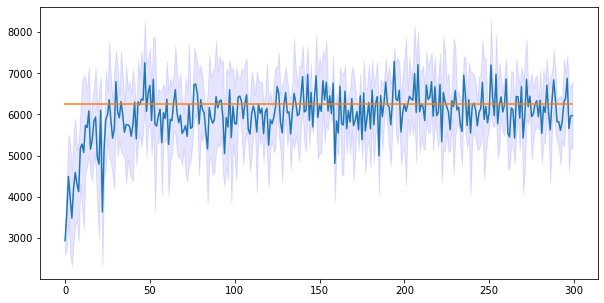

In [6]:
plt.figure(figsize=(10, 5))
mean = np.mean(rewards_iterations, axis=0)
stdev = np.std(rewards_iterations, axis=0)

plt.plot(range(len(mean)), mean)
plt.fill_between(range(len(mean)), (mean-stdev), (mean+stdev), color='b', alpha=.1)

plt.plot([_ for _ in range(len(rewards))], [clairvoyant_reward for _ in range(len(rewards))])
plt.show()

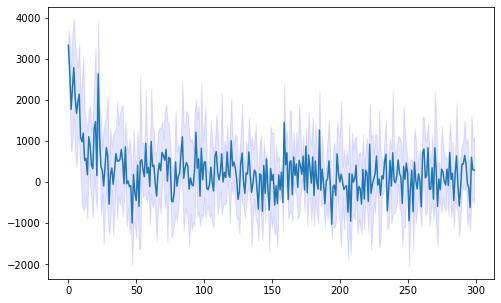

In [7]:
plt.figure(figsize=(8,5))
regret = clairvoyant_reward - rewards_iterations 
mean_regret = np.mean(regret, axis=0)
std_regret = np.std(regret, axis=0)

plt.plot(range(len(mean_regret)), mean_regret)
plt.fill_between(range(len(mean_regret)), (mean_regret-std_regret), (mean_regret+std_regret), color='b', alpha=.1)
plt.show()

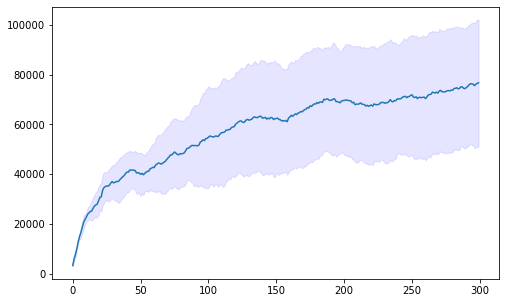

In [8]:
plt.figure(figsize=(8,5))
regret = clairvoyant_reward - rewards_iterations 
cumulative_regret = np.cumsum(regret, axis=1)
cum_reg_mean = np.mean(cumulative_regret, axis=0)
cum_reg_std = np.std(cumulative_regret, axis=0)

plt.plot(range(len(cum_reg_mean)), cum_reg_mean)
plt.fill_between(range(len(cum_reg_mean)), (cum_reg_mean-cum_reg_std), (cum_reg_mean+cum_reg_std), color='b', alpha=.1)
plt.show()

TS

In [9]:
# set new believed customer for the learner
customers = copy.deepcopy(environment.customers)
for customer in customers:
    customer.set_probability_buy(np.ones_like(customer.get_buy_distribution()))
    customer.set_probability_click(np.ones((n_products,n_products)))

In [10]:
rewards_iterations = []
for i in range(NUM_ITERATION):
    ts5_learner = TSLearner5(n_arms, n_products, customers, graph_json, arms, environment.customers_distribution)
    print('\nIteration #', i+1)
    for t in range(TIME_HORIZON):
        if t % 10 == 0:
            utils.progress_bar(t, TIME_HORIZON)
        super_arm = ts5_learner.select_superarm()
        report = environment.round(super_arm)
        ts5_learner.update(super_arm.copy(), report)
    rewards = ts5_learner.history_rewards
    rewards_iterations.append(np.array(rewards))
rewards_iterations = np.array(rewards_iterations)
rewards_iterations.shape


Iteration # 1
loading: [                              ] 0.0%
loading: [=                             ] 3.3%
loading: [==                            ] 6.7%
loading: [===                           ] 10.0%
loading: [====                          ] 13.3%
loading: [=====                         ] 16.7%
loading: [======                        ] 20.0%
loading: [=======                       ] 23.3%
loading: [========                      ] 26.7%
loading: [=========                     ] 30.0%
loading: [==========                    ] 33.3%
loading: [===========                   ] 36.7%
loading: [============                  ] 40.0%
loading: [=============                 ] 43.3%
loading: [==============                ] 46.7%
loading: [===============               ] 50.0%
loading: [================              ] 53.3%
loading: [=================             ] 56.7%
loading: [==================            ] 60.0%
loading: [===================           ] 63.3%
loading: [==================

(5, 300)

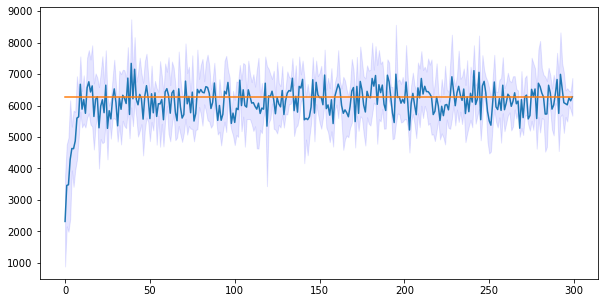

In [11]:
plt.figure(figsize=(10, 5))
mean = np.mean(rewards_iterations, axis=0)
stdev = np.std(rewards_iterations, axis=0)

plt.plot(range(len(mean)), mean)
plt.fill_between(range(len(mean)), (mean-stdev), (mean+stdev), color='b', alpha=.1)

plt.plot([_ for _ in range(len(rewards))], [clairvoyant_reward for _ in range(len(rewards))])
plt.show()

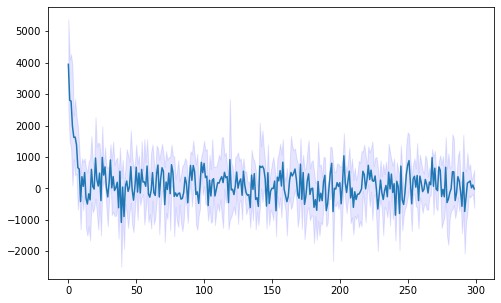

In [12]:
plt.figure(figsize=(8,5))
regret = clairvoyant_reward - rewards_iterations 
mean_regret = np.mean(regret, axis=0)
std_regret = np.std(regret, axis=0)

plt.plot(range(len(mean_regret)), mean_regret)
plt.fill_between(range(len(mean_regret)), (mean_regret-std_regret), (mean_regret+std_regret), color='b', alpha=.1)

plt.show()

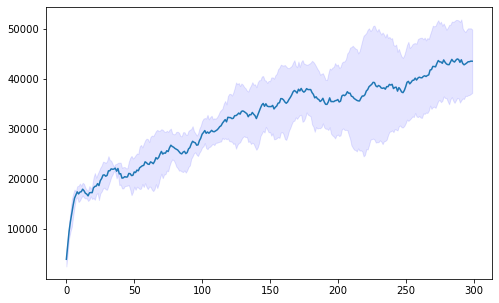

In [13]:
plt.figure(figsize=(8,5))
regret = clairvoyant_reward - rewards_iterations 
cumulative_regret = np.cumsum(regret, axis=1)
cum_reg_mean = np.mean(cumulative_regret, axis=0)
cum_reg_std = np.std(cumulative_regret, axis=0)

plt.plot(range(len(cum_reg_mean)), cum_reg_mean)
plt.fill_between(range(len(cum_reg_mean)), (cum_reg_mean-cum_reg_std), (cum_reg_mean+cum_reg_std), color='b', alpha=.1)

plt.show()

In [16]:
th_rews = list(rew_per_arm.values())
th_rews.sort()
delta_arms = (th_rews[-1] - th_rews[-2]) / today_customer
seen = np.array(ts5_learner.history_interactions)
theoretical_regret = 1024 * np.log(seen)/delta_arms

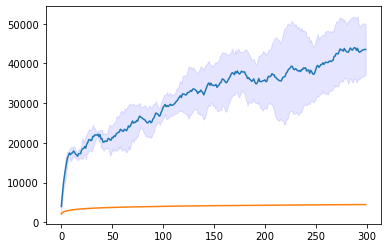

In [21]:
plt.plot(range(len(cum_reg_mean)), cum_reg_mean)
plt.fill_between(range(len(cum_reg_mean)), (cum_reg_mean-cum_reg_std), (cum_reg_mean+cum_reg_std), color='b', alpha=.1)
plt.plot(range(len(theoretical_regret)), theoretical_regret)
plt.show()